# Pollution and academic performance

This is the README for *Pollution and Academic Performance*.

Our question is:

Does the level of N02 pollution around schools in London affect the attendance and attainment of the pupils?

In order to replicate our analysis, please do the following:

* Run all cells in this notebook.

The report is this notebook, with all outputs.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Fancy plots
plt.style.use('fivethirtyeight')

# Data frame library
import pandas as pd

Numpy is a python library. As we imported it, we added supports for multi-dimensional and large matrices and arrays, along with big collections of high level of mathematical functions to operate on these arrays.

We used matplotlib which is a plotting library as it allows us to produce 2D graphics in various interactive environments.

As we used panda which is a software library for python, it enables us to analyse and manipulate the data.

# Literature review about 'Pollution and its effect on school absense'

1. In Janet Currie and her team-mates’ study and their literature about ‘Does pollution increase school absences’, they adopted the Texas Schools project which is a longitudinal administrative dataset of Texas’ student absenteeism. Then they aggregated the data of pollution from the Texas commission on quality of environment into 6week time blocks to combined with the administrative data of absenteeism. And they assumed that each person in different regions react similarly to the weather changes regardless of the implications of their actions for general air quality.  This assumption allows them to make relevant behavior changes uncorrelated with idiosyncratic changes in the quality of air so that they could put their focus on how the absences relate to the level of pollution. Through a set of experiments they did, they concluded that although they found a positive associations between absences and level of pollution, they did not find out a monotonically increasing relationship between these two factors (Currie et al., 2009). 




- Reference: Currie, J., Hanushek, E., Kahn, E., Neidell, M. and Rivkin, S. (2009). Does Pollution Increase School Absences?. Review of Economics and Statistics, [online] 91(4), pp.682-694. Available at: https://www.jstor.org/stable/25651370?seq=9#metadata_info_tab_contents [Accessed 17 Mar. 2019].



2. In Gilliland and his team-mates’ study and their literature about ‘The effects of ambient air pollution on school absenteeism due to respiratory illnesses’, they collected the data from CHS (Children’s health study) to evaluate the impact of pollution on students’ absenteeism. They studied 2,081 students in 4th grade who lived in 12 southern California communities. Then, they recorded these 2,081 students’ absences in the first 6 months of 1996 and asked their parents if their absence is due to illness or not, and if it’s due to illness, whether it was gastro-intestinal, upper-respiratory or lower-respiratory illness. They determined the illness based on the symptoms that were described by their parents in the phone interviews. By utilizing the 6months’ pollution data collected from those monitors that placed next to the schools and the CHS data, Gilliland and his team-mates tried to determine the effect that pollution has on the daily average absences due to the respiratory illness. Finally, they found out that the pollutant ozone had a statistically notable impact on both lower respiratory and upper respiratory illness rate which causes the students’ absences.



- Reference: Gilliland, F., Berhane, K., Rappaport, E., Thomas, D., Avol, E., Gauderman, W., London, S., Margolis, H., McConnell, R., Islam, K. and Peters, J. (2001). The Effects of Ambient Air Pollution on School Absenteeism Due to Respiratory Illnesses. Epidemiology, 12(1), pp.43-54.



# Pollution and its effect on school absence

Now we load our data

In [2]:
schoolpolutiondata = pd.read_csv('school polution.csv')
schoolpolutiondata.columns

Index([u'URN', u'Local Authority name', u'Establisment name', u'Easting',
       u'Northing', u'Type of Establishment', u'Phase of education',
       u'NO2ug/m3 mean 2013', u'Above limit', u'Parliamentary Constituences',
       u'Establishment Status', u'Close Date', u'Unnamed: 12'],
      dtype='object')

Here we delete the unnecessary colomns.

In [3]:
schoolpolutiondata = schoolpolutiondata.drop(['Local Authority name', 'Easting', 'Northing', 'Parliamentary Constituences', 'Close Date', 'Unnamed: 12'], axis=1)

In [4]:
primary_data = schoolpolutiondata[schoolpolutiondata['Phase of education'] == 'Primary']

In [5]:
Absences = pd.read_csv('england_abs.csv')

- This code is to make pandas open and read the csv file. 

In [6]:
Absences_polution = pd.merge(Absences, primary_data, on='URN')

- We merged the "Primary_data" which is a column of data extracted from "school pollution" data frame with the different data frame named as "Absences" by using the coding that we searched from internet sources
Reference: (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)

- We found out there are three columns of data that are irrelevant to our project which are:
1. 'Unnamed: 12'
2. 'Close Date'
3. 'PPERSABS15'
- Then we chose to drop these 3 columns of data by using the drop coding which researched from internet sources
Reference: (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

- This project is using a data set from this link: 
 https://data.gov.uk/dataset/90b02236-3a4e-4899-8bdc-7f5122df4d9e/schools-and-educational-institutions-air-quality-exposure-data-broken-down-by-parliamentary-constituency 
- I found this by looking at the open source data on data.gov 

- We made a data frame with only primary schools, this was because we decided to look at primary schools first, as there was an abundance of data to use. Once we had the programme written to analyze primary schools, it would be easy to adapt it for other ages.

We will define two functions needed for cleaning up the data, we chose to define functions in order to boost reusability:

How it works:
I found a function that checks if a value can be converted into a float and put it in the cell below.
Source: Eric Leschinski: https://stackoverflow.com/questions/736043/checking-if-a-string-can-be-converted-to-float-in-python

The way it does that is: it attempts to convert the variable to float by using the function float(). We expect to have the following non float values: NaN, NA and SUPP. NaN will pass throu the function and will be verified directly. The other non float values will raise "ValueError". This error is accounted for in the function and makes the function return "False".

In [7]:
def isfloat(value):
  try:
    float(value)      #try to convert to float
    return True
  except ValueError:  #it's a word so it can't convert to float
    return False

Small tests:

In [8]:
print(isfloat('12.98'))
print(isfloat('SUPP'))
print(isfloat('NaN'))

True
False
True


Observe how NaN passes throu the function. This means that it will have to be taken care of seperatley.

What the function bellow does:
- we make a bool array(clean) of lenght equal to that of the colomn we want to sort (the array will have True at the positions of numbers and False at the positions of words and NaN values)
- we use the array to sort the data frame
- transform the strings to floats

In [9]:
def all_floats (data_frame, colomn):
    '''
    This function returns a data frame where the original data frame's specified colomn is converted to float. Note: the function does not support any float that can not be transformed into a float directly by float().
    Parameters:
    data_frame - data frame of the column in question
    column - string - name of colomn
    Returns:
    data frame where all the values in column are floats
    '''
    clean = np.zeros(len(data_frame[colomn]),dtype=bool)
    cnt = 0
    delete = 0
    for row in data_frame[colomn]:
        if row is not np.nan and isfloat(row) == True:
            clean[cnt] = True
        else:
            clean[cnt] = False
        cnt += 1
    Clean_data_frame = data_frame[clean] #This delets all non numbers
    Clean_data_frame[colomn] = Clean_data_frame[colomn].astype(np.float)
    return Clean_data_frame

The data for absences is stored in the colomn "PERCTOT".

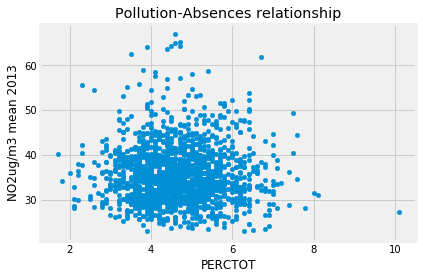

In [10]:
Absences_polution.plot.scatter('PERCTOT', 'NO2ug/m3 mean 2013', title = 'Pollution-Absences relationship')

In [11]:
#Here we split the table in Above- institutions above the polution limit at the time and Under- institutions below the polution limit at the time
Above = Absences_polution.loc[Absences_polution['Above limit']=='Yes']
Under = Absences_polution.loc[Absences_polution['Above limit']=='No']

In [12]:
np.median(Absences_polution['PERCTOT'])

4.6

In [13]:
np.median(Above['PERCTOT'])

4.7

In [14]:
np.median(Under['PERCTOT'])

4.6

We used plot.scatter coding here to produce a scatter graph for two variables which are 'level of NO2' and 'Percentage of absences'

Also, we calculated the medium for the:
- total absences 4.6
- absences of institutions above the pollution limit 4.7
- absences of institutions under the pollution limit 4.6

As the graph shows, the level of NO2 and the percentage of absences do not have a significant correlation as most of the points are allocated on the similar area instead of locating as a linear regression line.

Also, the medians have very close values.

We conclude that pollution and absences are not strongly correlated.

We moved on to prolonged absences.

The data for prolonged absences is stored in the column "PPERSABS15".

In [15]:
Absences_polution = all_floats(Absences_polution, 'PPERSABS15')

/ext/sage/sage-8.6_1804/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


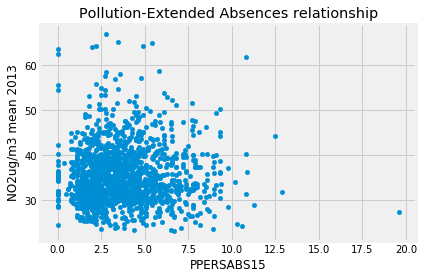

In [16]:
Absences_polution.plot.scatter('PPERSABS15', 'NO2ug/m3 mean 2013', title = 'Pollution-Extended Absences relationship')

In [17]:
Above = Absences_polution.loc[Absences_polution['Above limit']=='Yes']
Under = Absences_polution.loc[Absences_polution['Above limit']=='No']

In [18]:
PPERSABS15_Above_mean = np.mean(Above['PPERSABS15'])
PPERSABS15_Above_mean

3.8624573378839577

In [19]:
PPERSABS15_Under_mean = np.mean(Under['PPERSABS15'])
PPERSABS15_Under_mean

3.6452461799660476

In [20]:
PPERSABS15_General_mean = np.mean(Absences_polution['PPERSABS15'])
PPERSABS15_General_mean

3.688511216859283

# Literature review about 'Pollution and its effect on academic performance'

- In Miller and his team-mates’ study and their literature about ‘The Effects of air pollution on educational outcomes: Evidence from Chile’, they adopted the school-level pollution data from 1997 to 2012 that is reported and published by the SINCA (Sistema de Information Nacional de Calidad del Aire) of the environment ministry. For the school performance data, they used the test scores generated by the SIMCE (Sistema de Medicion de la Calidad de la Educacion) test that is undertaken by the Education Ministry for all schools in Chile. Then they made a assumption that unnoticed time-varying variables would not have a impact on both test scores and pollution. Through a set of experiments and analysis, they concluded that they found out some regressions that indicated a strong negative association between pollution and school performance (Miller and Vela, 2013)



- Reference: Miller, S. and Vela, M. (2013). The Effects of Air Pollution on Educational Outcomes: Evidence from Chile. SSRN Electronic Journal. [online] Available at: https://publications.iadb.org/en/publication/11349/effects-air-pollution-educational-outcomes-evidence-chile [Accessed 17 Mar. 2019].



# Pollution and its effect on academic performance

In [21]:
performance_data = pd.read_csv('england_ks2final_primary_relevent_columns.csv')
performance_data

- Performance data is a condensed csv created by editing the original excel file (school polution.csv) to keep only columns which we are going to use for the analysis, we did this by saving the excel as a csv, then uploading it to CoCalc. We had to do this because CoCalc didn't have enough RAM to cope with the two versions of school polution.csv

1. The first coding is to make panda read and open the csv file which named as "school pollution"
2. The second coding extracts the "phase of education" column in which has "Primary" from the "school pollution" data frame.

Previously, we have 3 codings which are:

 1. Absences = pd.read_csv('england_abs.csv')
 2. Absences_polution=pd.merge(Absences, primary_data, on='URN')
 3. Absences_polution = Absences_polution.drop (['Unnamed: 12', 'Close Date', 'PPERSABS15'], axis=1)

In the process of tidying up the coding, we found out these 3 coding has been run before which means they are three extra codings that can be avoided. Therefore, we decided to eliminate these 3 codings to make our project more clearer and understandable.


In [22]:
performance_data.columns

Index([u'RECTYPE', u'URN', u'PCODE', u'TELNUM', u'TKS1EXP_L', u'PKS1EXP_L',
       u'TKS1EXP_M', u'PKS1EXP_M', u'TKS1EXP_H', u'PKS1EXP_H', u'TFSMCLA',
       u'PTFSMCLA', u'PT2MATH12', u'PT2READ12', u'PT2WRITTA12', u'TAPS',
       u'AVGLEVEL', u'PT2MATH12_B', u'PT2MATH12_G', u'PT2MATH12_L',
       u'PT2MATH12_M', u'PT2MATH12_H', u'PTREADX', u'PTREADAT',
       u'GAPN_3YR_RWMX_FSMCLA', u'GAPN_2YR_PRREAD_NOTFSMCLA',
       u'GAPN_2YR_PRWRIT_NOTFSMCLA', u'GAPN_3YR_PRMAT_NOTFSMCLA'],
      dtype='object')

There are many colomns we don't need. So, we will cut the unnecessary columns.

In [23]:
performance_data = performance_data.drop(['RECTYPE','PCODE','TELNUM','TKS1EXP_L','PKS1EXP_L', 'TKS1EXP_M', 'PKS1EXP_M', 'TKS1EXP_H', 'PKS1EXP_H', 'TFSMCLA', 'PTFSMCLA', 'PT2MATH12', 'PT2READ12', 'PT2WRITTA12', 'AVGLEVEL', 'PT2MATH12_B', 'PT2MATH12_G', 'PT2MATH12_L', 'PT2MATH12_M', 'PT2MATH12_H', 'PTREADX', 'PTREADAT', 'GAPN_3YR_RWMX_FSMCLA', 'GAPN_2YR_PRREAD_NOTFSMCLA', 'GAPN_2YR_PRWRIT_NOTFSMCLA', 'GAPN_3YR_PRMAT_NOTFSMCLA'],axis=1)

During codeing review we found this code to be inefficient:

performance_abs_pol = pd.merge(Absences_polution, performance_data, on='URN')

In [24]:
performance_pol = pd.merge(schoolpolutiondata, performance_data, on='URN')

In [25]:
Clean_perf_pol = all_floats (performance_pol, 'TAPS')

/ext/sage/sage-8.6_1804/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [26]:
#Big test: a- total number of elements; cnt-number of float elements
cnt = 0
a = 0
for i in Clean_perf_pol["TAPS"]:
    a += 1
    if type(i) == float:
        cnt += 1
print [a,cnt]

[1503, 1503]


Inspiration for the test above: https://stackoverflow.com/questions/49887707/python-with-pandas-keyerror-uthe-label-422-is-not-in-the-index

Now we will calculate the median values of the performance of institutions above and bellow the accepted pollution limit.

In [27]:
Above = Clean_perf_pol[Clean_perf_pol['Above limit']=='Yes']
Under = Clean_perf_pol[Clean_perf_pol['Above limit']=='No']

In [28]:
print(np.median(Clean_perf_pol['TAPS']))
print(np.median(Above['TAPS']))
print(np.median(Under['TAPS']))

29.0
28.7
29.1


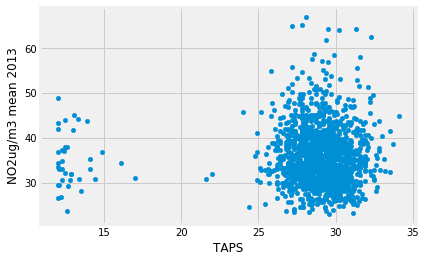

In [29]:
Clean_perf_pol.plot.scatter('TAPS', 'NO2ug/m3 mean 2013')

- Those plots that are loacated at the left hand side of the scatter graph seems to be odds, therefore, we want to figure out if these schools are special schools, such as school for disabled students.

In [30]:
Taps_less_than_20= Clean_perf_pol['TAPS'] < 20

In [31]:
np.count_nonzero(Taps_less_than_20)

37

In [32]:
Clean_perf_pol[Taps_less_than_20]

,URN,Establisment name,Type of Establishment,Phase of education,NO2ug/m3 mean 2013,Above limit,Establishment Status,TAPS
67,131023,Stephen Hawking School,Community Special School,Not applicable,49.0,Yes,Open,12.0
149,100378,Queensmill School,Community Special School,Not applicable,45.2,Yes,Open,13.1
202,100096,Swiss Cottage School - Development & Research ...,Community Special School,Not applicable,44.2,Yes,Open,13.3
204,100987,Phoenix School,Community Special School,Not applicable,44.1,Yes,Open,12.5
208,100469,Samuel Rhodes MLD School,Community Special School,Not applicable,43.9,Yes,Open,13.9
229,100881,Cherry Garden School,Community Special School,Not applicable,43.4,Yes,Open,12.0
277,100467,Richard Cloudesley PH School,Community Special School,Not applicable,42.1,Yes,Open,12.0
305,134030,The Bridge School,Community Special School,Not applicable,41.7,Yes,Open,13.0
598,100878,Haymerle School,Community Special School,Not applicable,37.9,No,Open,12.5
599,100643,Turney Primary and Secondary Special School,Foundation Special School,Not applicable,37.9,No,Open,12.6


By looking at the TAPS value that less than 20, we could clearly see that these schools are all special schools which makes the scatterplot more sensable.

Let's see how funding works into this

# This uses grants offered to schools for various reasons
Includes funds delegated by the LA, funding for 6th form students, SEN funding, funding for minority ethnic pupils, standards fund, other government grants, other grants and payments, SSG pupil focused, pupil focused extended school funding and/or grants and Additional grant for schools

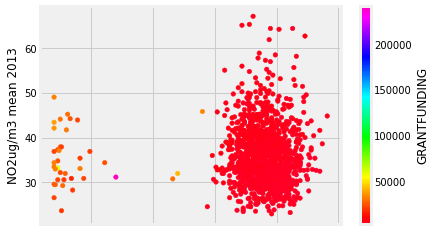

In [34]:
funds = pd.read_csv('england_cfr.csv')
new = pd.merge(Clean_perf_pol,funds,on = 'URN')
new.plot.scatter('TAPS', 'NO2ug/m3 mean 2013',c = 'GRANTFUNDING', colormap = 'gist_rainbow')

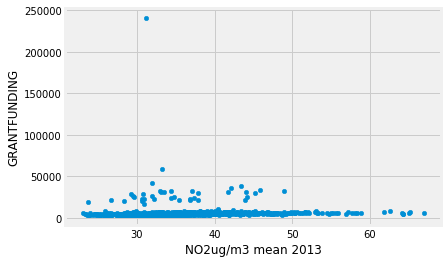

In [35]:
new.plot.scatter('NO2ug/m3 mean 2013', 'GRANTFUNDING')

In [36]:
new[new['GRANTFUNDING']>200000]

,URN,Establisment name,Type of Establishment,Phase of education,NO2ug/m3 mean 2013,Above limit,Establishment Status,TAPS,LONDON/NON-LONDON,MEDIAN,...,PT1112CAT3LA,PT1213CAT3LA,PT0910CAT4LA,PT1011CAT4LA,PT1112CAT4LA,PT1213CAT4LA,PT0910CAT5LA,PT1011CAT5LA,PT1112CAT5LA,PT1213CAT5LA
1130,100763,New Woodlands School,Community Special School,Not applicable,31.2,No,Open,17.0,London,Special,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This school is for kids with Social, emotional and mental health (SEMH) needs. These are a type of special educational needs in which children/young people have severe difficulties in managing their emotions and behaviour. They often show inappropriate responses and feelings to situations. The school runs lots of outreach programmes for parents of the children who attend. These help to improve the home life of the pupils, which may be a factor in their behavoiur. This is the reason why the school gets lots of funding, because it spends lots of money on supporting the pupils and their parents.

We don't have problems with them below because we only work with primary school data in the Absences_polution data frame

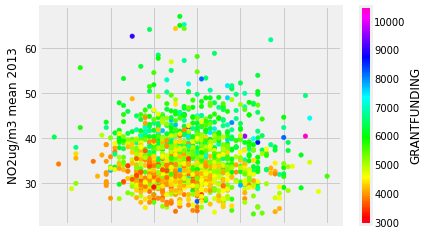

In [37]:
funding_absences = pd.merge(Absences_polution, funds, on='URN')
funding_absences.plot.scatter('PERCTOT', 'NO2ug/m3 mean 2013',c = 'GRANTFUNDING', colormap = 'gist_rainbow')

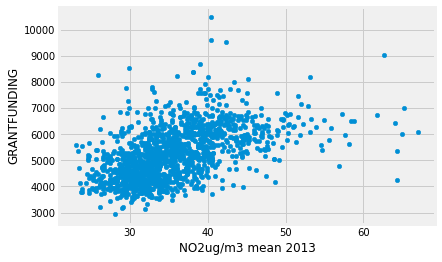

In [38]:
funding_absences.plot.scatter('NO2ug/m3 mean 2013', 'GRANTFUNDING')

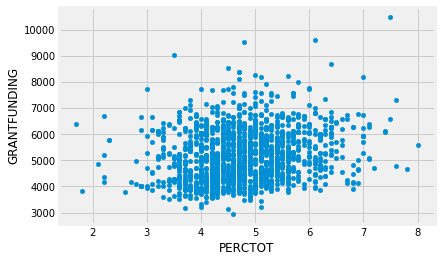

In [39]:
funding_absences.plot.scatter('PERCTOT', 'GRANTFUNDING')

# This uses income generated by the facility
Includes income from facilities and services, receipts from other insurance claims, income from contributions to visits etc, donations and/or private funds

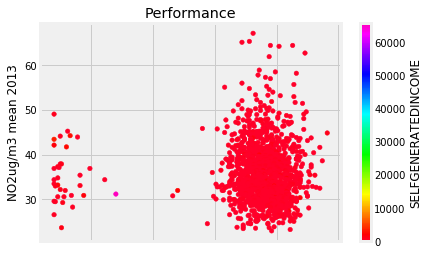

In [40]:
new.plot.scatter('TAPS', 'NO2ug/m3 mean 2013',c = 'SELFGENERATEDINCOME', colormap = 'gist_rainbow', title = 'Performance')

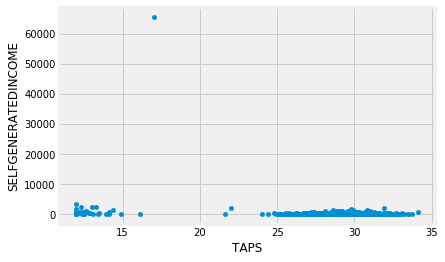

In [41]:
new.plot.scatter('TAPS', 'SELFGENERATEDINCOME')

In [42]:
new[new['SELFGENERATEDINCOME']>60000]

,URN,Establisment name,Type of Establishment,Phase of education,NO2ug/m3 mean 2013,Above limit,Establishment Status,TAPS,LONDON/NON-LONDON,MEDIAN,...,PT1112CAT3LA,PT1213CAT3LA,PT0910CAT4LA,PT1011CAT4LA,PT1112CAT4LA,PT1213CAT4LA,PT0910CAT5LA,PT1011CAT5LA,PT1112CAT5LA,PT1213CAT5LA
1130,100763,New Woodlands School,Community Special School,Not applicable,31.2,No,Open,17.0,London,Special,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


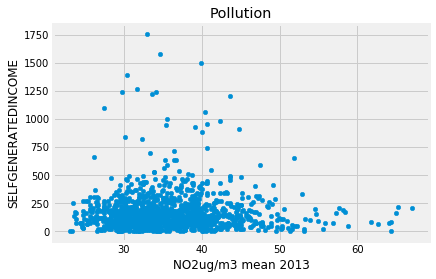

In [43]:
funding_absences.plot.scatter('NO2ug/m3 mean 2013', 'SELFGENERATEDINCOME', title = 'Pollution')

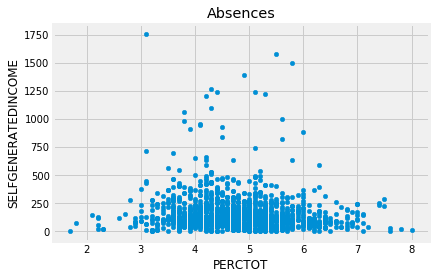

In [44]:
funding_absences.plot.scatter('PERCTOT', 'SELFGENERATEDINCOME', title = 'Absences')

# Let's now look at the total income

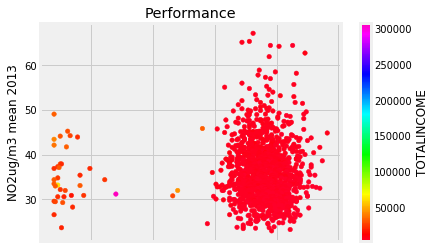

In [45]:
new.plot.scatter('TAPS', 'NO2ug/m3 mean 2013',c = 'TOTALINCOME', colormap = 'gist_rainbow', title = 'Performance')

The gradiant on this plot is so useless it hurts

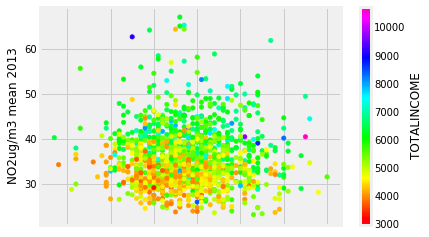

In [46]:
funding_absences.plot.scatter('PERCTOT', 'NO2ug/m3 mean 2013',c = 'TOTALINCOME', colormap = 'gist_rainbow')

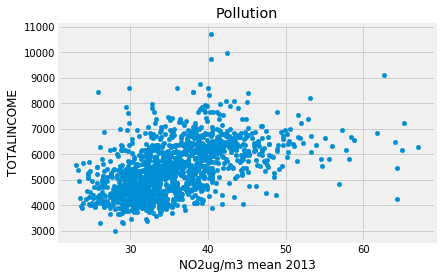

In [47]:
funding_absences.plot.scatter('NO2ug/m3 mean 2013', 'TOTALINCOME', title = 'Pollution')

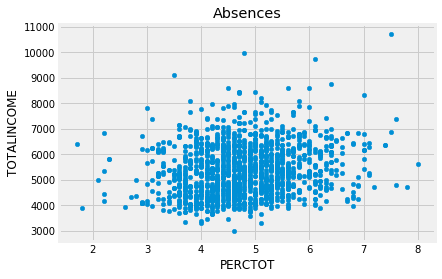

In [48]:
funding_absences.plot.scatter('PERCTOT', 'TOTALINCOME', title = 'Absences')

Bellow we made the best fit line for the correlation we found

In [61]:
from scipy.stats import linregress
line = linregress(funding_absences['NO2ug/m3 mean 2013'], funding_absences['GRANTFUNDING'])
slope = line [0]
intercept = line[1]

In [62]:
predict = funding_absences['NO2ug/m3 mean 2013']*slope + intercept

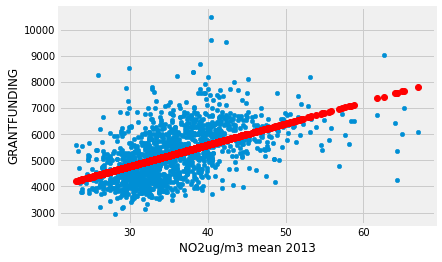

In [65]:
funding_absences.plot.scatter('NO2ug/m3 mean 2013', 'GRANTFUNDING')
plt.plot(funding_absences['NO2ug/m3 mean 2013'], predict,'ro')

In [66]:
yerr = funding_absences['GRANTFUNDING']-predict

<ErrorbarContainer object of 3 artists>

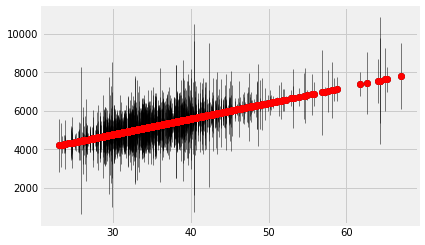

In [85]:
#funding_absences.plot.scatter('NO2ug/m3 mean 2013', 'GRANTFUNDING')
plt.plot(funding_absences['NO2ug/m3 mean 2013'], predict,'ro')
plt.errorbar(funding_absences['NO2ug/m3 mean 2013'],predict,yerr=yerr, fmt='ko', elinewidth=0.5, barsabove = True)